In [1]:
from pathlib import Path
import xml.etree.ElementTree as ET
import numpy as np
import os
import os.path
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import uuid
import pandas as pd

In [16]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)/416
        xmin = int(boxes.find("bndbox/xmin").text)/416
        ymax = int(boxes.find("bndbox/ymax").text)/416
        xmax = int(boxes.find("bndbox/xmax").text)/416

        x=(xmax-xmin)/2
        y=(ymax-ymin)/2
        width=xmax-xmin
        height=ymax-ymin

        list_with_single_boxes = [1,xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes

In [17]:
df = pd.DataFrame(columns = ['image', 'text'])
for i in range(len(os.listdir('annotations'))):
    path=os.path.join('annotations/',os.listdir('annotations')[i])
    name, boxes = read_content(path)
    t=name.split('s')[1].split('.')[0]
    filepath='labels/'+t+".txt"
    np.savetxt(filepath,boxes,fmt='%i %.6f %.6f %.6f %.6f')
    df=df.append({'image':name,'text':filepath.split('/')[1]},ignore_index=True)

In [19]:
df=pd.read_csv('train.csv')

In [20]:
df.head()

,image,text
0,hard_hat_workers0.png,0.txt
1,hard_hat_workers1.png,1.txt
2,hard_hat_workers10.png,10.txt
3,hard_hat_workers100.png,100.txt
4,hard_hat_workers1000.png,1000.txt


In [10]:
img_path='images/'
label_path='labels/'

In [21]:
img=cv2.imread(os.path.join(img_path,df.image[0]))

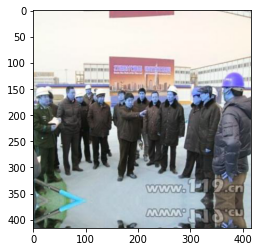

In [22]:
plt.imshow(img)

In [23]:
boxes=[]

In [24]:
with open(os.path.join(label_path,df.text[0])) as f:
    for label in f.readlines():
        class_label,x,y,width,height=[float(x) if float(x)!=int(float(x)) else int(x)
                    for x in label.replace('\n','').split()]
        boxes.append([class_label,x,y,width,height])

In [25]:
boxes

[[1, 0.858173, 0.278846, 0.971154, 0.420673],
 [1, 0.009615, 0.350962, 0.09375, 0.442308],
 [1, 0.608173, 0.334135, 0.661058, 0.425481],
 [1, 0.721154, 0.348558, 0.776442, 0.435096],
 [1, 0.278846, 0.362981, 0.331731, 0.432692],
 [1, 0.192308, 0.362981, 0.240385, 0.432692],
 [1, 0.149038, 0.346154, 0.199519, 0.413462],
 [1, 0.774038, 0.338942, 0.829327, 0.427885],
 [1, 0.420673, 0.375, 0.466346, 0.447115],
 [1, 0.533654, 0.362981, 0.576923, 0.4375],
 [1, 0.480769, 0.350962, 0.519231, 0.415865],
 [1, 0.235577, 0.336538, 0.269231, 0.384615],
 [1, 0.377404, 0.360577, 0.420673, 0.425481]]